#Importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
import pickle


#Importando dados de uma url para um dataframe

In [2]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/robsonbassanesi/MVP_04_V2/master/backend/database/cancer_data.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


#Separação em conjunto de treino e conjunto de teste com holdout


In [3]:
# Removendo a coluna 'id' que não é informativa para o modelo
dataset = dataset.drop('id', axis=1)

# Convertendo a coluna 'diagnosis' para valores numéricos (Maligno: 1, Benigno: 0)
dataset['diagnosis'] = dataset['diagnosis'].map({'M': 1, 'B': 0})

# Separando os dados em features (X) e rótulos (y)
X = dataset.drop('diagnosis', axis=1)
y = dataset['diagnosis']

# Definindo a semente global para garantir reprodutibilidade
seed = 7

# Separando em conjuntos de treino e teste usando holdout
test_size = 0.2  # proporção para o conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=test_size,
    random_state=seed,
    stratify=y  # garantindo que a proporção de classes seja mantida nos conjuntos de treino e teste
)

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

# Exibindo informações sobre os conjuntos
print(f"Tamanho do conjunto de treino: {len(X_train)} amostras")
print(f"Tamanho do conjunto de teste: {len(X_test)} amostras")

df = pd.DataFrame(X_test)
df.head()


Tamanho do conjunto de treino: 455 amostras
Tamanho do conjunto de teste: 114 amostras


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
159,10.90,12.96,68.69,366.8,0.07515,0.03718,0.00309,0.006588,0.1442,0.05743,...,18.20,78.07,470.0,0.1171,0.08294,0.01854,0.03953,0.2738,0.07685,NaN
501,13.82,24.49,92.33,595.9,0.11620,0.16810,0.13570,0.067590,0.2275,0.07237,...,32.94,106.00,788.0,0.1794,0.39660,0.33810,0.15210,0.3651,0.11830,NaN
31,11.84,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.051820,0.2301,0.07799,...,28.12,119.40,888.7,0.1637,0.57750,0.69560,0.15460,0.4761,0.14020,NaN
514,15.05,19.07,97.26,701.9,0.09215,0.08597,0.07486,0.043350,0.1561,0.05915,...,28.06,113.80,967.0,0.1246,0.21010,0.28660,0.11200,0.2282,0.06954,NaN
167,16.78,18.80,109.30,886.3,0.08865,0.09182,0.08422,0.065760,0.1893,0.05534,...,26.30,130.70,1260.0,0.1168,0.21190,0.23180,0.14740,0.2810,0.07228,NaN


#Modelagem e inferencia

#Criação e avaliação de modelos: linha base

KNN: 0.936377 (0.024666)
CART: 0.940773 (0.027641)
NB: 0.945217 (0.039046)
SVM: 0.925507 (0.033690)


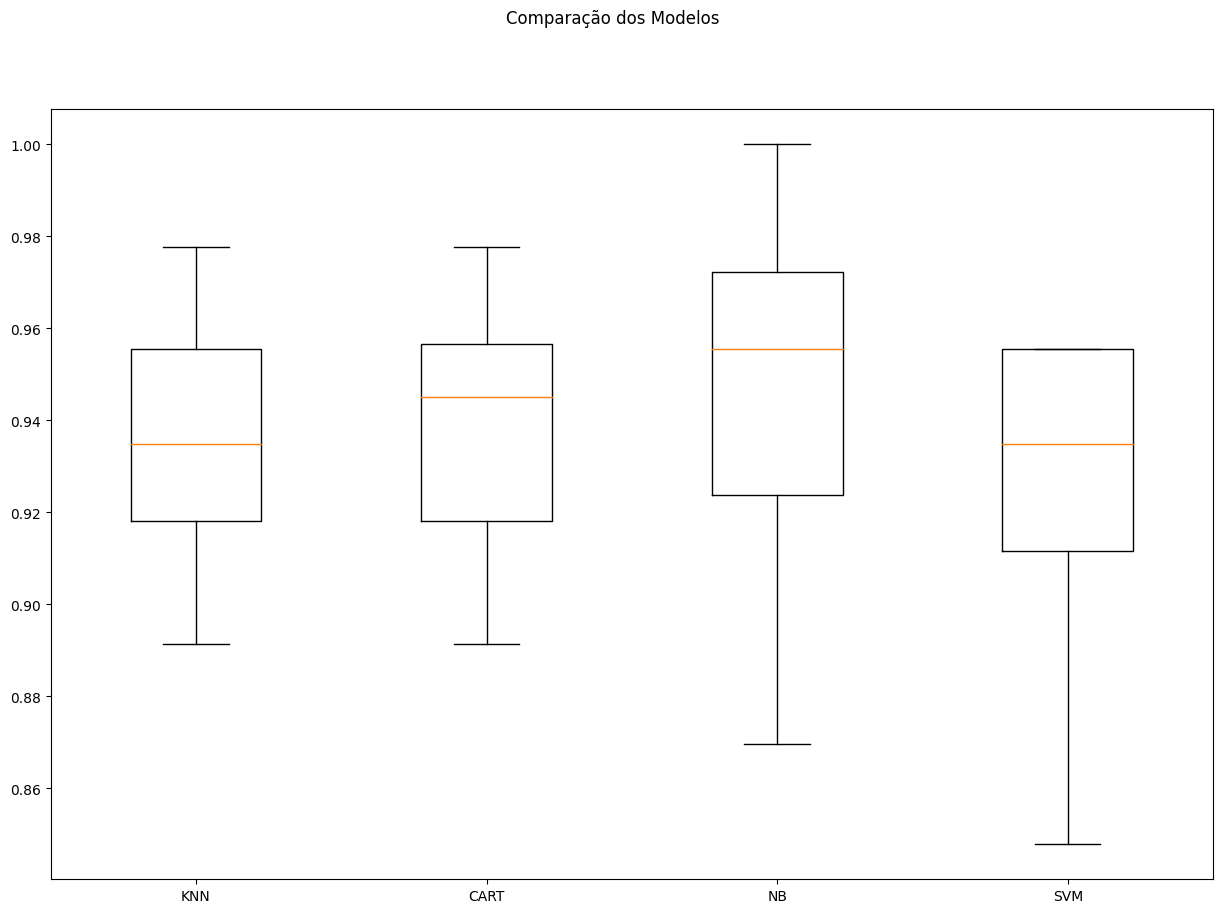

In [4]:
# Definindo a semente global para garantir reprodutibilidade
np.random.seed(7)

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Imputação dos dados ausentes usando média
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Avaliação dos modelos
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train_imputed, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.936 (0.025)
CART-orig: 0.941 (0.028)
NB-orig: 0.945 (0.039)
SVM-orig: 0.926 (0.034)
KNN-padr: 0.967 (0.024)
CART-padr: 0.943 (0.026)
NB-padr: 0.943 (0.029)
SVM-padr: 0.974 (0.033)
KNN-norm: 0.974 (0.013)
CART-norm: 0.950 (0.022)
NB-norm: 0.943 (0.029)
SVM-norm: 0.976 (0.033)


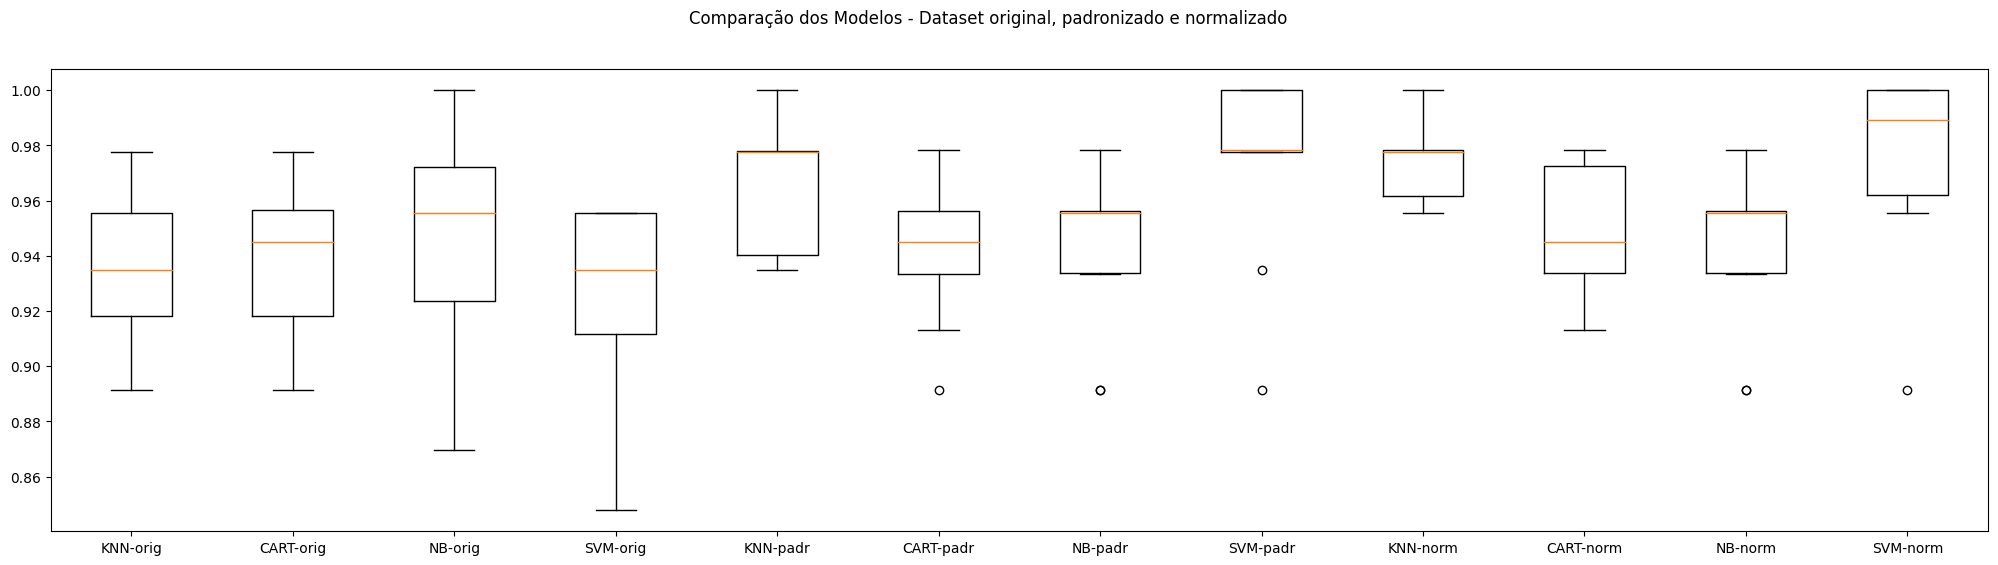

In [5]:

# Definindo a semente global para garantir reprodutibilidade
np.random.seed(7)

# Listas para armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criando a validação cruzada estratificada
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

# Definindo a métrica de avaliação
scoring = 'accuracy'

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([('imputer', SimpleImputer(strategy='mean')), knn])))
pipelines.append(('CART-orig', Pipeline([('imputer', SimpleImputer(strategy='mean')), cart])))
pipelines.append(('NB-orig', Pipeline([('imputer', SimpleImputer(strategy='mean')), naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([('imputer', SimpleImputer(strategy='mean')), svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler()), knn])))
pipelines.append(('CART-padr', Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler()), cart])))
pipelines.append(('NB-padr', Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler()), naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler()), svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', MinMaxScaler()), knn])))
pipelines.append(('CART-norm', Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', MinMaxScaler()), cart])))
pipelines.append(('NB-norm', Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', MinMaxScaler()), naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', MinMaxScaler()), svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())  # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25, 6))
fig.suptitle('Comparação dos Modelos - Dataset original, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Otimização dos hiperparâmetros

In [6]:
# Definindo a semente global para garantir reprodutibilidade
np.random.seed(7)

# Criando o modelo KNN
knn = KNeighborsClassifier()

# Criando o pipeline com o imputador, o escalonador e o modelo
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('knn', knn)
])

# Definindo a grade de hiperparâmetros a serem testados
param_grid = {
    'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'knn__metric': ["euclidean", "manhattan", "minkowski"],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

# Criando o objeto StratifiedKFold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

# Criando o objeto GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='accuracy', cv=kfold)

# Realizando a busca em grade
grid_result = grid_search.fit(X_train, y_train)

# Exibindo os resultados
print("Melhores Parâmetros: ", grid_result.best_params_)
print("Melhor Acurácia Média: ", grid_result.best_score_)

Melhores Parâmetros:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'uniform'}
Melhor Acurácia Média:  0.9738164251207729


# Finalização do Modelo

In [7]:
# Definindo a semente global para garantir reprodutibilidade
np.random.seed(7)

# Imputação dos dados ausentes usando média
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Padronização dos dados
scaler = StandardScaler().fit(X_train_imputed)
rescaledX_train = scaler.transform(X_train_imputed)
rescaledX_test = scaler.transform(X_test_imputed)

# Preparação do modelo
model = KNeighborsClassifier(metric='manhattan', n_neighbors=3)
model.fit(rescaledX_train, y_train)

# Estimativa da acurácia no conjunto de teste
predictions = model.predict(rescaledX_test)
accuracy = accuracy_score(y_test, predictions)
print("Acurácia no Conjunto de Teste: ", accuracy)

Acurácia no Conjunto de Teste:  0.9473684210526315


In [8]:
# Imputação dos dados ausentes usando média
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Padronização dos dados
scaler = StandardScaler().fit(X_imputed)
rescaledX = scaler.transform(X_imputed)

# Preparação do modelo
model = KNeighborsClassifier(metric='manhattan', n_neighbors=3)
model.fit(rescaledX, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

# Simulando a aplicação do modelo em dados não vistos

In [9]:
# Colunas presentes no conjunto de dados original
columns = [
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
    "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean",
    "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se",
    "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se",
    "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst",
    "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst",
    "symmetry_worst", "fractal_dimension_worst"
]

# Criando novos dados simulados
new_data = {
    'radius_mean': [15.0, 20.0, 25.0],
    'texture_mean': [18.0, 25.0, 30.0],
    'perimeter_mean': [100.0, 120.0, 150.0],
    'area_mean': [700.0, 1000.0, 1500.0],
    'smoothness_mean': [0.1, 0.15, 0.2],
    'compactness_mean': [0.2, 0.25, 0.3],
    'concavity_mean': [0.15, 0.2, 0.25],
    'concave points_mean': [0.1, 0.12, 0.15],
    'symmetry_mean': [0.22, 0.23, 0.24],
    'fractal_dimension_mean': [0.05, 0.06, 0.07],
    'radius_se': [0.5, 0.6, 0.7],
    'texture_se': [1.0, 1.2, 1.5],
    'perimeter_se': [3.0, 3.5, 4.0],
    'area_se': [50.0, 60.0, 70.0],
    'smoothness_se': [0.01, 0.012, 0.015],
    'compactness_se': [0.015, 0.018, 0.02],
    'concavity_se': [0.01, 0.012, 0.015],
    'concave points_se': [0.005, 0.006, 0.007],
    'symmetry_se': [0.02, 0.022, 0.025],
    'fractal_dimension_se': [0.005, 0.006, 0.007],
    'radius_worst': [18.0, 22.0, 28.0],
    'texture_worst': [20.0, 24.0, 30.0],
    'perimeter_worst': [120.0, 140.0, 180.0],
    'area_worst': [900.0, 1100.0, 1600.0],
    'smoothness_worst': [0.15, 0.18, 0.2],
    'compactness_worst': [0.25, 0.3, 0.35],
    'concavity_worst': [0.2, 0.25, 0.3],
    'concave points_worst': [0.1, 0.12, 0.15],
    'symmetry_worst': [0.25, 0.28, 0.3],
    'fractal_dimension_worst': [0.08, 0.1, 0.12],
}

# Criando um DataFrame com os novos dados simulados
new_df = pd.DataFrame(new_data, columns=columns)

# Obtendo apenas as características presentes nos novos dados
new_features = new_df.columns

# Criando o imputador
imputer = SimpleImputer(strategy='mean')

# Imputação dos novos dados simulados
new_imputed = pd.DataFrame(imputer.fit_transform(new_df), columns=new_features)

# Padronização dos novos dados simulados
new_rescaled = pd.DataFrame(scaler.transform(new_imputed), columns=new_features)

print(new_rescaled)

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.247862     -0.300110        0.330797   0.128300         0.259022   
1     1.667933      1.328837        1.154601   0.981531         3.817294   
2     3.088003      2.492371        2.390307   2.403582         7.375566   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          1.812880        0.768373             1.317579       1.417958   
1          2.760454        1.396121             1.833458       1.783053   
2          3.708028        2.023870             2.607278       2.148147   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0               -1.814194  ...      0.358421      -0.924501         0.379435   
1               -0.396590  ...      1.186751      -0.273125         0.975152   
2                1.021014  ...      2.429246       0.703937         2.166586   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [10]:
# Realizando previsões
predictions = model.predict(new_rescaled)

# Mapeando as previsões para 'M' ou 'B'
prediction_labels = ['M' if pred == 1 else 'B' for pred in predictions]

# Exibindo as previsões
result_df = pd.DataFrame({'Prediction': prediction_labels})
print(result_df)

  Prediction
0          M
1          M
2          M


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


#Exportar arquivo PKL

In [11]:
pickle_out = open("modelo_finalizado.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()

#Conclusão:

A estrutura utilizada para validação e processamento dos dados foi a mesma apresentada em aula, e o modelo que obteve a melhor acurácia foi o KNeighborsClassifier com 3 vizinhos, alcançando 94% de acurácia. Utilizei um conjunto de dados público sobre câncer de mama com cerca de 570 registros. O objetivo era identificar se o câncer era maligno ou benigno, considerando medidas de biópsia.